This project had been in the pipeline for around 4 years. This timeline represents the time I first learned about Data Science, until now, when I am a proficient coder. Due to this HUGE stretch of time, the code in the start may not be as consice are the code towards the end. I am lucky to have this journey, and glad that I have learned enough to take this project from start to finish. Here I present an end to end project that uses a few features to try and predict a good time. 

Note: When I begun this project I was a student and under the guide of an amazing math professor at CSU Stanislaus. I will always be appreciative of that guidance. 

A more technical introduction:

My background is a B.S in Physics, and before that, a Track and Field athlete. I have always loved the sport and wanted my project to revolve around it. In this project I use data from Athletic.net which includes and ID number, Gender( which I chose to do one at a time, and started with Male. Bad decision as I never had the chance to get the female data), Seasons, 400m, 800m, 1500m, and 1600m times. 

The goal of this part of the project is:
1. Explore and format data.
2. Clean and filter.
3. Plot the data with box plots, histograms, and relplot.

In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns


In [2]:
original_tf_data = pd.read_csv("first_upload.csv")

df = pd.DataFrame(original_tf_data, columns=['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters'])
columnsTitles = ['ID Number','Gender','Grade Level','Season','400 Meters','800 Meters','1500 Meters','1600 Meters']
original_tf_df = df.reindex(columns=columnsTitles)

original_tf_df
copy_df = original_tf_df.copy()

In [3]:
copy_df

,ID Number,Gender,Grade Level,Season,400 Meters,800 Meters,1500 Meters,1600 Meters
0,21,M,12th Grade,2007 Outdoor Season,57.74,NaN,NaN,NaN
1,21,M,12th Grade,2007 Outdoor Season,57.34c,NaN,NaN,NaN
2,21,M,12th Grade,2007 Outdoor Season,56.14c,NaN,NaN,NaN
3,21,M,12th Grade,2007 Outdoor Season,57.2h,NaN,NaN,NaN
4,21,M,12th Grade,2007 Outdoor Season,58.8h,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
41784,19989,M,12th Grade,2005 Outdoor Season,54.14c,NaN,NaN,NaN
41785,19991,M,12th Grade,2005 Outdoor Season,NaN,3:27.3h,NaN,NaN
41786,19991,M,12th Grade,2005 Outdoor Season,NaN,3:14.3h,NaN,NaN
41787,19991,M,12th Grade,2005 Outdoor Season,NaN,3:21.5h,NaN,NaN


In [4]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41789 entries, 0 to 41788
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID Number    41789 non-null  int64 
 1   Gender       41789 non-null  object
 2   Grade Level  41789 non-null  object
 3   Season       41789 non-null  object
 4   400 Meters   14362 non-null  object
 5   800 Meters   12910 non-null  object
 6   1500 Meters  14315 non-null  object
 7   1600 Meters  200 non-null    object
dtypes: int64(1), object(7)
memory usage: 2.6+ MB


In [5]:
# this is the laters version of these def I am running

null_times = {np.nan,'nan','DNR','nt','no time','FS','DQ','NT','SCR','DNS','DNF','na','MB', 'shot 29.9', 'NS', '?'}

def time_convert(x):
    if (str(x)[-1]=='c') or (str(x)[-1]=='h'):
        x = str(x)[:-1] 
    x_split = str(x).split(':')
    if not '.' in x_split[-1]:
        x = str(x) + '.00'
    #print(x)
    ##Annoying edge cases
    if (x_split[-1] == '60.00') or (x_split[-1] =='60.0') or (x_split[-1] == '28/0'):
      #print('here')
      return np.nan

    if (x[-1] == 'a'):
      #print('here')
      return(np.nan)

    if (str(x) == '57.4**'):
      #print(x)
      return(np.nan)

    if len(x_split)==1:
        t = datetime.datetime.strptime(x, '%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==2:
      t = datetime.datetime.strptime(x, '%M:%S.%f').time()
      return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)

    if len(x_split)==3:
        t = datetime.datetime.strptime(x, '%H:%M:%S.%f').time()
        return((t.hour * 60 + t.minute) *60 + t.second+ 0.000001*t.microsecond)
  

In [6]:
#One dataframe for each event
#here we are doing the final filtering of these df's
#by using a list of wrongly input features, we can check if those values are in any 
#row of these 400m cols. if it is, it is filtered out using the '~'. 
#finally, convert time is applied to convert each input time to seconds. 

df_400 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '400 Meters']]
df_400 = df_400[~df_400['400 Meters'].isin(null_times)]
df_400['400 Meters'] = df_400['400 Meters'].apply(time_convert)

df_800 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '800 Meters']]
df_800 = df_800[~df_800['800 Meters'].isin(null_times)]
df_800['800 Meters'] = df_800['800 Meters'].apply(time_convert)

df_1500 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1500 Meters']]
df_1500 = df_1500[~df_1500['1500 Meters'].isin(null_times)]
df_1500['1500 Meters'] = df_1500['1500 Meters'].apply(time_convert)

df_1600 = copy_df[['ID Number', 'Gender', 'Grade Level', 'Season', '1600 Meters']]
df_1600 = df_1600[~df_1600['1600 Meters'].isin(null_times)]

df_1600['1600 Meters'] = df_1600['1600 Meters'].apply(time_convert)

In [7]:
df_1600.info()
df_1600[(df_1600['1600 Meters']>500) | (df_1600['1600 Meters']<100)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 158 to 41559
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    196 non-null    int64  
 1   Gender       196 non-null    object 
 2   Grade Level  196 non-null    object 
 3   Season       196 non-null    object 
 4   1600 Meters  195 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.2+ KB


,ID Number,Gender,Grade Level,Season,1600 Meters
5324,2325,M,11th Grade,2005 Outdoor Season,57.8
5341,2326,M,10th Grade,2005 Outdoor Season,56.3
5356,2328,M,12th Grade,2005 Outdoor Season,56.6
5418,2329,M,10th Grade,2005 Outdoor Season,55.6
5437,2331,M,12th Grade,2005 Outdoor Season,57.6
14911,6342,M,12th Grade,2004 Outdoor Season,53.0
14940,6344,M,12th Grade,2004 Outdoor Season,56.0
14958,6345,M,12th Grade,2004 Outdoor Season,54.0
15014,6346,M,10th Grade,2004 Outdoor Season,56.0
16508,7083,M,10th Grade,2004 Outdoor Season,5.0


In [8]:
df_1500.info()
df_1500[(df_1500['1500 Meters']>500) | (df_1500['1500 Meters']<100)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14195 entries, 72 to 41777
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    14195 non-null  int64  
 1   Gender       14195 non-null  object 
 2   Grade Level  14195 non-null  object 
 3   Season       14195 non-null  object 
 4   1500 Meters  14188 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 665.4+ KB


,ID Number,Gender,Grade Level,Season,1500 Meters
971,652,M,9th Grade,2004 Outdoor Season,815.70
1303,726,M,11th Grade,2004 Outdoor Season,579.54
4260,1727,M,12th Grade,2004 Outdoor Season,534.20
5448,2336,M,9th Grade,2004 Outdoor Season,534.30
10224,4204,M,9th Grade,2004 Outdoor Season,1666.00
14035,5891,M,9th Grade,2004 Outdoor Season,0.00
16730,7349,M,9th Grade,2004 Outdoor Season,616.50
16783,7400,M,12th Grade,2005 Outdoor Season,61.70
18023,8086,M,12th Grade,2007 Outdoor Season,509.60
18650,8501,M,12th Grade,2004 Outdoor Season,571.00


In [9]:
df_800.info()
df_800[(df_800['800 Meters']>250) | (df_800['800 Meters']<50)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12783 entries, 12 to 41788
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    12783 non-null  int64  
 1   Gender       12783 non-null  object 
 2   Grade Level  12783 non-null  object 
 3   Season       12783 non-null  object 
 4   800 Meters   12782 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 599.2+ KB


,ID Number,Gender,Grade Level,Season,800 Meters
1081,690,M,12th Grade,2004 Outdoor Season,325.30
4428,1845,M,9th Grade,2004 Outdoor Season,385.12
10182,4193,M,11th Grade,2005 Outdoor Season,1322.00
18712,8547,M,12th Grade,2008 Outdoor Season,266.90
18957,8669,M,10th Grade,2004 Outdoor Season,382.00
19358,8988,M,12th Grade,2005 Outdoor Season,268.90
19359,8988,M,12th Grade,2005 Outdoor Season,261.34
19360,8988,M,12th Grade,2005 Outdoor Season,276.13
19485,9103,M,9th Grade,2004 Outdoor Season,3178.00
21124,10335,M,10th Grade,2006 Outdoor Season,750.60


In [10]:
df_400.info()
#There is something wrong with these 15 out of 14k in how their times were reported
df_400[(df_400['400 Meters']>180) | (df_400['400 Meters']<40)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14223 entries, 0 to 41784
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID Number    14223 non-null  int64  
 1   Gender       14223 non-null  object 
 2   Grade Level  14223 non-null  object 
 3   Season       14223 non-null  object 
 4   400 Meters   14188 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.7+ KB


,ID Number,Gender,Grade Level,Season,400 Meters
8570,3580,M,11th Grade,2005 Outdoor Season,3304.00
10159,4193,M,12th Grade,2006 Outdoor Season,3213.14
15147,6416,M,12th Grade,2005 Outdoor Season,3694.14
15543,6657,M,9th Grade,2004 Outdoor Season,3573.00
16189,6988,M,9th Grade,2004 Outdoor Season,3375.14
16190,6988,M,9th Grade,2004 Outdoor Season,3429.14
18396,8322,M,10th Grade,2004 Outdoor Season,12.24
18974,8676,M,11th Grade,2005 Outdoor Season,5775.14
26686,12583,M,11th Grade,2007 Outdoor Season,3309.00
27009,12633,M,9th Grade,2005 Outdoor Season,3574.14


<AxesSubplot:>

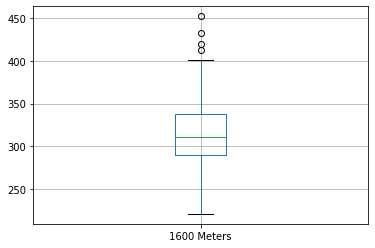

In [11]:
#a boxplot is used here to visualize the times, and see where outliers lay, and where the averages lie.
df_1600[(df_1600['1600 Meters']<500) & (df_1600['1600 Meters']>100)].boxplot(column = ['1600 Meters'])

<AxesSubplot:>

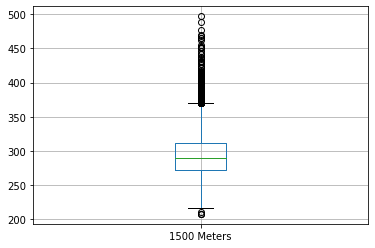

In [12]:
#a boxplot is used here to visualize the times, and see where outliers lay, and where the averages lie.
df_1500[(df_1500['1500 Meters']<500) & (df_1500['1500 Meters']>100)].boxplot(column = ['1500 Meters'])

<AxesSubplot:>

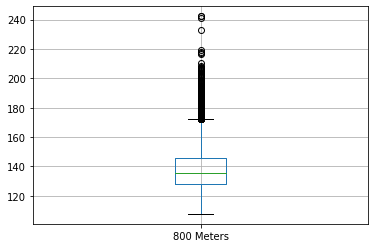

In [13]:
#a boxplot is used here to visualize the times, and see where outliers lay, and where the averages lie.
df_800[(df_800['800 Meters']<250) & (df_800['800 Meters']>50)].boxplot(column = ['800 Meters'])

<AxesSubplot:>

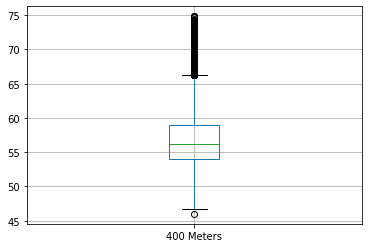

In [14]:
#a boxplot is used here to visualize the times, and see where outliers lay, and where the averages lie.
df_400[(df_400['400 Meters']<75) & (df_400['400 Meters']>40)].boxplot(column = ['400 Meters'])

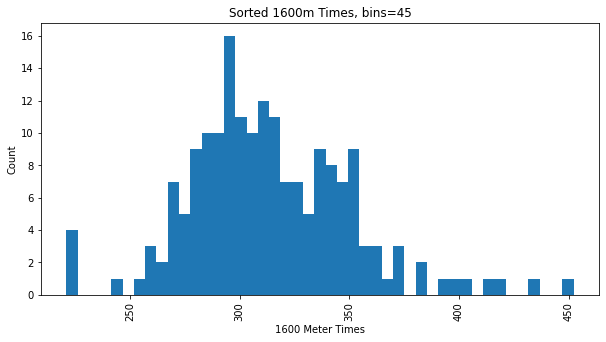

In [15]:
#here a hist is used to check the distribution is normal, and out data looks good
times_1600m= df_1600[(df_1600['1600 Meters']<500) & (df_1600['1600 Meters']>100)]['1600 Meters'].dropna().sort_values()
plt.figure(figsize=(10, 5))
plt.hist(times_1600m, bins=45)
plt.xlabel('1600 Meter Times')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title("Sorted 1600m Times, bins=45")
plt.show()

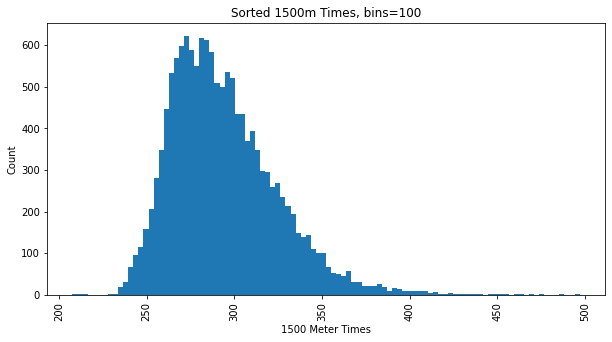

In [16]:
#here a hist is used to check the distribution is normal, and out data looks good
times_1500m= df_1500[(df_1500['1500 Meters']<500) & (df_1500['1500 Meters']>100)]['1500 Meters'].dropna().sort_values()
plt.figure(figsize=(10, 5))
plt.hist(times_1500m, bins=100)
plt.xlabel('1500 Meter Times')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title("Sorted 1500m Times, bins=100")
plt.show()

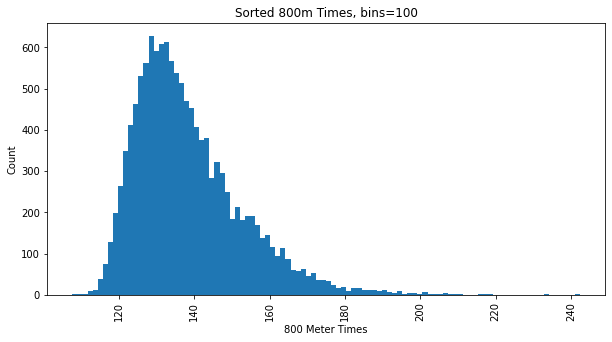

In [17]:
#here a hist is used to check the distribution is normal, and out data looks good
times_800m= df_800[(df_800['800 Meters']<250) & (df_800['800 Meters']>50)]['800 Meters'].dropna().sort_values()
plt.figure(figsize=(10, 5))
plt.hist(times_800m, bins=100)
plt.xlabel('800 Meter Times')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title("Sorted 800m Times, bins=100")
plt.show()

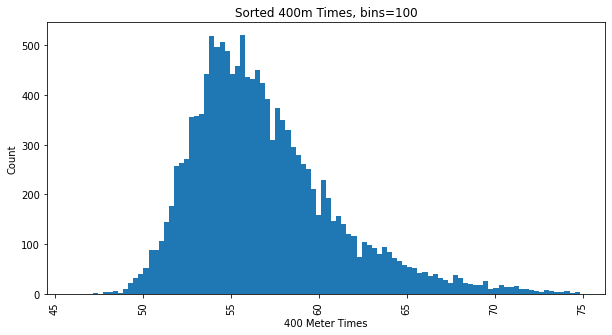

In [18]:
#here a hist is used to check the distribution is normal, and out data looks good
times_400m= df_400[(df_400['400 Meters']<75) & (df_400['400 Meters']>40)]['400 Meters'].dropna().sort_values()
plt.figure(figsize=(10, 5))
plt.hist(times_400m, bins=100)
plt.xlabel('400 Meter Times')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title("Sorted 400m Times, bins=100")
plt.show()

In [20]:
#Here I am grouping the cols together and agg the values of the 1500m col. 
#this allows for a clean df with the three groupby features untouched while finding the fastest times per feature.
df_1500_best = df_1500.groupby(['ID Number','Season', 'Grade Level', 'Gender']).agg({'1500 Meters' : min})

#resetting the index to allow regular indexing of the df after using groupby.
#also doing another dropna to filter out.
df_1500_best = df_1500_best.dropna().reset_index()

#using unique I am able to find an id number per person. 
#this is for identifying people in multiple df's.
unique_1500_best_time = df_1500_best['ID Number'].unique()
len(unique_1500_best_time)

2062

In [21]:
#Here I am grouping the cols together and agg the values of the 1600m col. 
#this allows for a clean df with the three groupby features untouched while finding the fastest times per feature.
df_1600_best = df_1600.groupby(['ID Number','Season', 'Grade Level', 'Gender']).agg({'1600 Meters' : min})

#resetting the index to allow regular indexing of the df after using groupby.
#also doing another dropna to filter out.
df_1600_best = df_1600_best.dropna().reset_index()

#using unique I am able to find an id number per person. 
#this is for identifying people in multiple df's.
unique_1600_best_time = df_1600_best['ID Number'].unique()
len(unique_1600_best_time)


145

In [22]:
#Here I am grouping the cols together and agg the values of the 800m col. 
#this allows for a clean df with the three groupby features untouched while finding the fastest times per feature.
df_800_best = df_800.groupby(['ID Number', 'Season', 'Grade Level', 'Gender']).agg({'800 Meters' : min})

#resetting the index to allow regular indexing of the df after using groupby. 
#also doing another dropna to filter out.
df_800_best = df_800_best.dropna().reset_index()

#finding unique id #s. this will help to identify which athletes have competed in multiple events
unique_800_best_time = df_800_best['ID Number'].unique()
len(unique_800_best_time)

2139

In [23]:
#group together the relevant columns, and find the minimum 400m times.
df_400_best = df_400.groupby(['ID Number', 'Season', 'Grade Level', 'Gender']).agg({'400 Meters' : min})

#droping the last nans and resetting the index so that we can index columns as usual 
df_400_best = df_400_best.dropna().reset_index()

#finding unique id #s. this will help to identify which athletes have competed in multiple events
unique_400_best_time = df_400_best['ID Number'].unique()
len(unique_400_best_time)

2674

In [24]:
#merging 400m and 800m df on id and season columns so that the id#, season, grade level, and times are all unique
merged_400_800 = df_800_best.merge(df_400_best, how='inner', on=['ID Number','Season', 'Grade Level'])

#this brings up a problem with grade level, leaving 4 items with '?'
mismarked_merged_400_800 = merged_400_800[merged_400_800['Grade Level'] == '?']

#dropping these rows with said '?'
merged_400_800.drop([952, 988, 1003, 1013], axis=0, inplace=True)

#checking if the rows were successfully dropped
merged_400_800[merged_400_800['Grade Level'] == '?']
len(merged_400_800)
merged_400_800

,ID Number,Season,Grade Level,Gender_x,800 Meters,Gender_y,400 Meters
0,21,2004 Outdoor Season,9th Grade,M,132.60,M,56.10
1,21,2005 Outdoor Season,10th Grade,M,135.00,M,53.70
2,21,2006 Outdoor Season,11th Grade,M,133.50,M,54.04
3,21,2007 Outdoor Season,12th Grade,M,127.35,M,54.40
4,63,2002 Outdoor Season,9th Grade,M,128.90,M,57.84
...,...,...,...,...,...,...,...
1560,19812,2008 Outdoor Season,12th Grade,M,125.43,M,52.50
1561,19926,2006 Outdoor Season,11th Grade,M,154.00,M,65.24
1562,19982,2005 Outdoor Season,11th Grade,M,165.60,M,64.24
1563,19983,2005 Outdoor Season,11th Grade,M,130.60,M,58.04


In [25]:
#merging 400m and 1600m df on id and season columns so that the id#, season, grade level, and times are all unique
merged_400_1600 = df_1600_best.merge(df_400_best, how='inner', on=['ID Number','Season', 'Grade Level'])
#print('4/16', merged_400_1600.isnull().sum())

#merging 400m and 1500m df on id and season columns so that the id#, season, grade level, and times are all unique
merged_400_1500 = df_1500_best.merge(df_400_best, how='inner', on=['ID Number','Season', 'Grade Level'])
#print('4/15', merged_400_1500.isnull().sum())

#this brings up a problem with grade level, leaving 4 items with '?'
mismarked_merged_400_1500 = merged_400_1500[merged_400_1500['Grade Level'] == '?']
print(mismarked_merged_400_1500)

#dropping these rows with said '?'
merged_400_1500.drop([16, 554, 721, 729, 1124], axis=0, inplace=True)

#merging 800m and 1600m df on id and season columns so that the id#, season, grade level, and times are all unique
merged_800_1600 = df_1600_best.merge(df_800_best, how='inner', on=['ID Number','Season', 'Grade Level'])
#print('8/16', merged_800_1600.isnull().sum())

#merging 800m and 1500m df on id and season columns so that the id#, season, grade level, and times are all unique
merged_800_1500 = df_1500_best.merge(df_800_best, how='inner', on=['ID Number','Season', 'Grade Level'])
#print('8/15', merged_800_1500.isnull().sum())

#this brings up a problem with grade level, leaving 4 items with '?'
mismarked_merged_800_1500 = merged_800_1500[merged_800_1500['Grade Level'] == '?']
#print(mismarked_merged_800_1500)

#dropping these rows with said '?'
merged_800_1500.drop([1486, 1561], axis=0, inplace=True)

      ID Number                                    Season Grade Level  \
16          340  2011 Outdoor Season                                ?   
554        8947  2004 Outdoor Season                                ?   
721       11755  2005 Outdoor Season                                ?   
729       11815  2005 Outdoor Season                                ?   
1124      19349  2005 Outdoor Season                                ?   

     Gender_x  1500 Meters Gender_y  400 Meters  
16          M       282.52        M       56.11  
554         M       318.00        M       60.14  
721         M       269.40        M       56.84  
729         M       342.20        M       63.20  
1124        M       290.50        M       61.34  


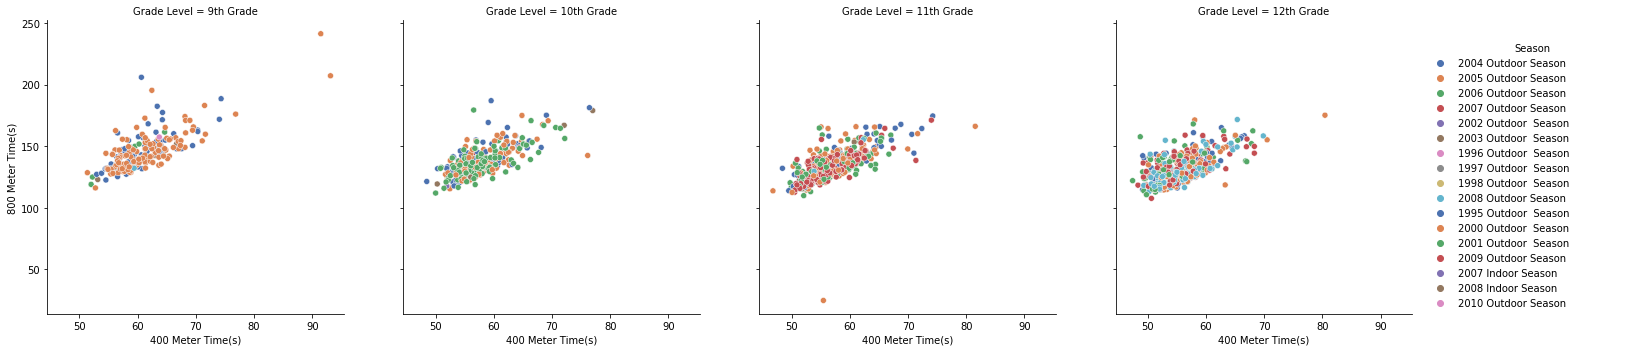

In [26]:
# plotting the 400m v 800m times in seconds. using relplot, I have created cols of the grade level. and colored based on season. 
p1 = sns.relplot(
    data=merged_400_800, x='400 Meters', y='800 Meters', kind='scatter', 
    hue='Season', palette ='deep', col='Grade Level', col_order=['9th Grade', '10th Grade', '11th Grade', '12th Grade']
)
plt.subplots_adjust(wspace=0.2)
p1.set_axis_labels("400 Meter Time(s)", "800 Meter Time(s)")
plt.show()

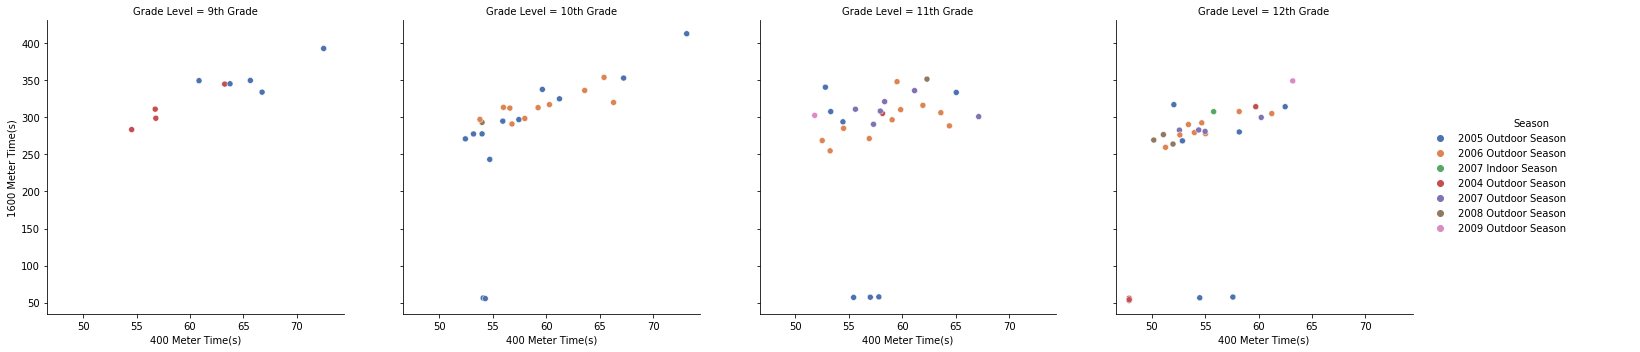

In [27]:
# plotting the 400m v 1600m times in seconds. using relplot, I have created cols of the grade level. and colored based on season. 
p2 = sns.relplot(
    data=merged_400_1600, x='400 Meters', y='1600 Meters', kind='scatter', 
    hue='Season', palette ='deep', col='Grade Level', col_order=['9th Grade', '10th Grade', '11th Grade', '12th Grade']
)
plt.subplots_adjust(wspace=0.2)
p2.set_axis_labels("400 Meter Time(s)", "1600 Meter Time(s)")
plt.show()

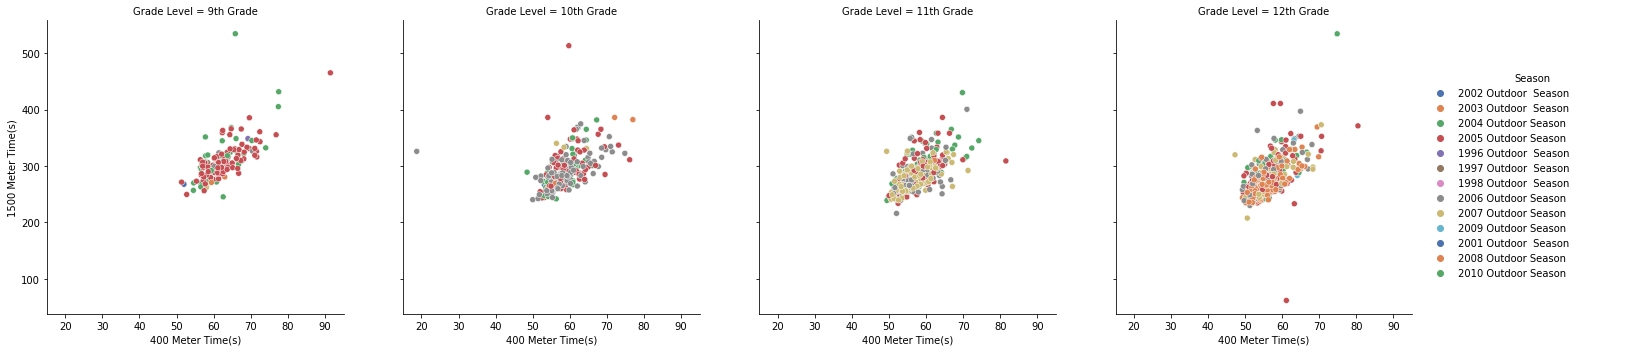

In [28]:
# plotting the 400m v 1500m times in seconds. using relplot, I have created cols of the grade level. and colored based on season. 
p3 = sns.relplot(
    data=merged_400_1500, x='400 Meters', y='1500 Meters', kind='scatter', 
    hue='Season', palette ='deep', col='Grade Level', col_order=['9th Grade', '10th Grade', '11th Grade', '12th Grade']
)
plt.subplots_adjust(wspace=0.2)
p3.set_axis_labels("400 Meter Time(s)", "1500 Meter Time(s)")
plt.show()

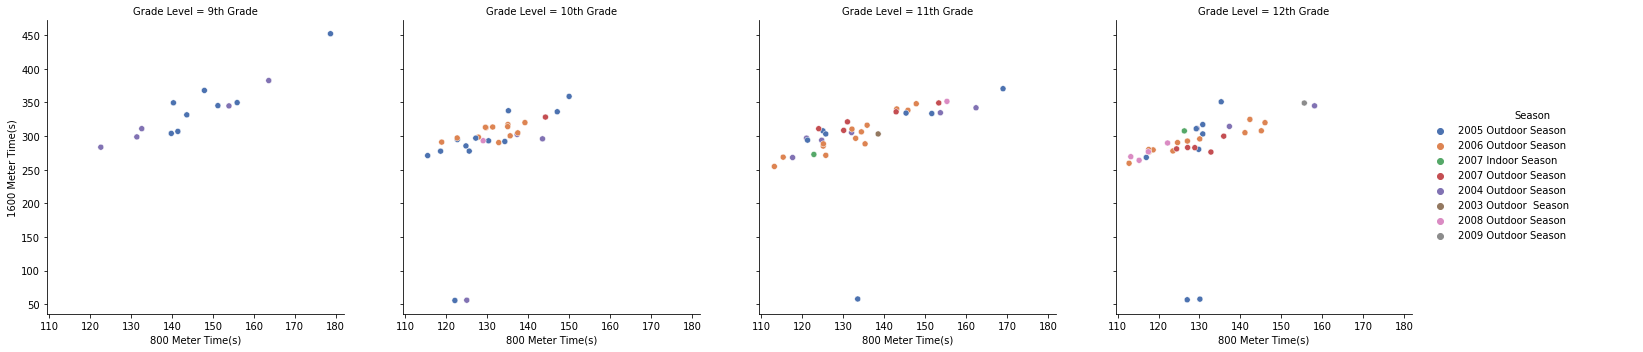

In [29]:
# plotting the 800m v 1600m times in seconds. using relplot, I have created cols of the grade level. and colored based on season. 
p4 = sns.relplot(
    data=merged_800_1600, x='800 Meters', y='1600 Meters', kind='scatter', 
    hue='Season', palette ='deep', col='Grade Level', col_order=['9th Grade', '10th Grade', '11th Grade', '12th Grade']
)
plt.subplots_adjust(wspace=0.2)
p4.set_axis_labels("800 Meter Time(s)", "1600 Meter Time(s)")
plt.show()

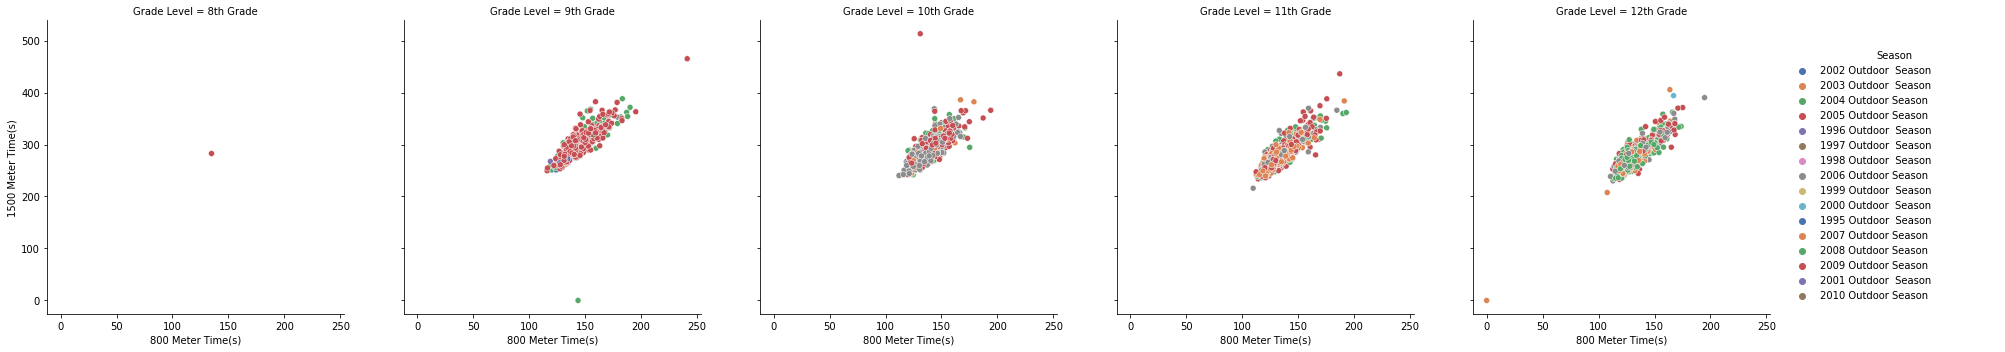

In [30]:
# plotting the 800m v 1500m times in seconds. using relplot, I have created cols of the grade level. and colored based on season. 
p5 = sns.relplot(
    data=merged_800_1500, x='800 Meters', y='1500 Meters', kind='scatter', 
    hue='Season', palette ='deep', col='Grade Level', col_order=['8th Grade', '9th Grade', '10th Grade', '11th Grade', '12th Grade']
)
plt.subplots_adjust(wspace=0.2)
p5.set_axis_labels("800 Meter Time(s)", "1500 Meter Time(s)")
plt.show()

At this point, we have dropped, sorted, and visualized lots of data. I am confident that the data we have is correlated and can be used further with ML techniques. 